In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

import plotly as py
import plotly.graph_objs as go
from plotly import tools


# from plotly.offline import download_plotlyjs, init_notebook_mode, 
#  iplot,(init_notebook_mode,connected=True)

In [2]:
df=pd.read_json('train.json')

In [3]:
df.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 4 to 37707
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bathrooms       15000 non-null  float64
 1   bedrooms        15000 non-null  int64  
 2   latitude        15000 non-null  float64
 3   longitude       15000 non-null  float64
 4   price           15000 non-null  int64  
 5   interest_level  0 non-null      float64
 6   year            15000 non-null  int64  
 7   month           15000 non-null  int64  
 8   weekday         15000 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 1.1 MB


In [4]:
df = df.iloc[:15000]

In [65]:
df.describe()

,bathrooms,bedrooms,latitude,longitude,price,interest_level,year,month,weekday
count,15000.00000,15000.000000,15000.000000,15000.000000,1.500000e+04,0.0,15000.0,15000.000000,15000.000000
mean,1.21130,1.567467,40.746344,-73.961993,4.060084e+03,NaN,2016.0,5.999600,2.877533
std,0.50238,1.118421,0.474340,0.855780,3.788882e+04,NaN,0.0,0.019997,1.761498
min,0.00000,0.000000,0.000000,-76.633600,7.000000e+02,NaN,2016.0,5.000000,0.000000
25%,1.00000,1.000000,40.727500,-73.991700,2.500000e+03,NaN,2016.0,6.000000,1.000000
50%,1.00000,1.000000,40.751800,-73.977400,3.150000e+03,NaN,2016.0,6.000000,3.000000
75%,1.00000,2.000000,40.774700,-73.954700,4.100000e+03,NaN,2016.0,6.000000,4.000000
max,6.50000,8.000000,44.603800,0.000000,4.490000e+06,NaN,2016.0,6.000000,6.000000


In [5]:
df = df.drop("building_id", axis='columns')
df = df.drop("manager_id", axis='columns')
df = df.drop("photos", axis='columns')

In [6]:
df = df.drop("description", axis='columns')
df = df.drop("features", axis='columns')
df = df.drop("listing_id", axis='columns')

In [7]:
df['time'] = pd.to_datetime(df['created'], format='%Y-%m-%dT%H:%M:%S')
df['year'] = pd.DatetimeIndex(df['time']).year
df['month'] = pd.DatetimeIndex(df['time']).month
df['weekday'] = pd.DatetimeIndex(df['time']).weekday

In [8]:
df = df.drop(['display_address','street_address','created', 'time'], axis = 1)

In [31]:
df["interest_level"] = df["interest_level"].map({"low":0,"medium":1,"high":2})

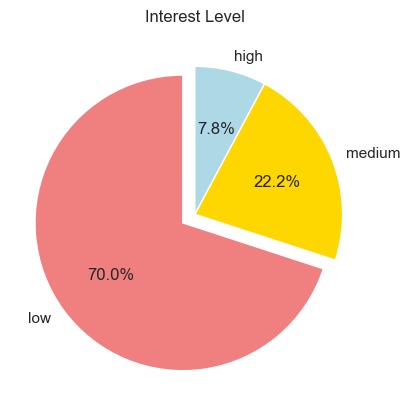

In [26]:
#INTEREST LEVEL
labels = ["low","medium","high"]
sizes = df.interest_level.value_counts().values
explode=[0.1,0,0]
colors = [  'lightcoral','gold','lightblue']
patches, texts,autotexts= plt.pie(sizes, labels=labels,colors=colors,explode=explode,autopct="%1.1f%%",
                        startangle=90)
plt.title("Interest Level")
plt.show()

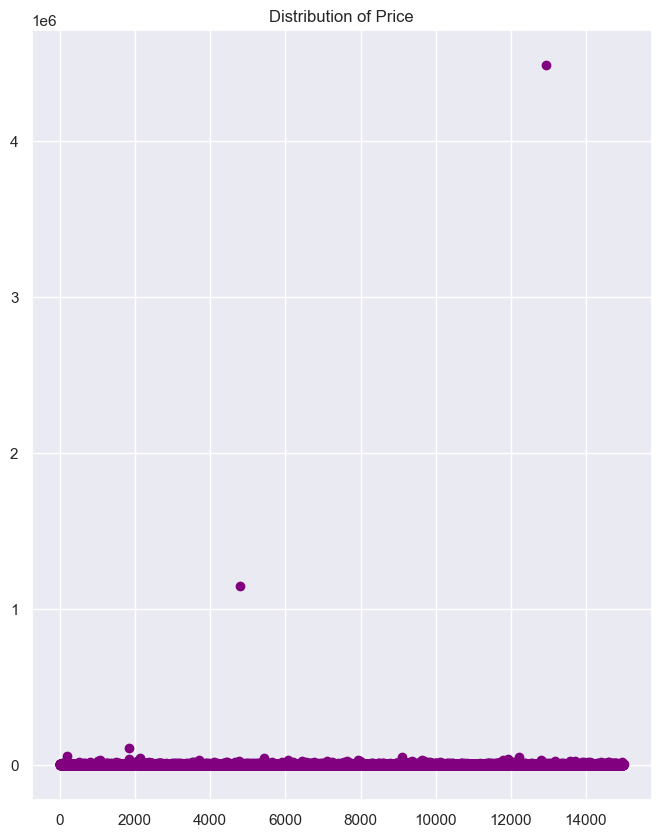

In [25]:
#PRICE
plt.figure(figsize=(8, 10))
plt.scatter(range(df.shape[0]), df["price"].values,color='purple')
plt.title("Distribution of Price");

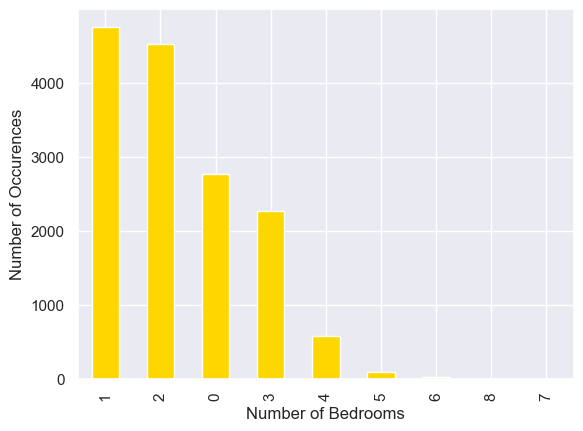

In [36]:
df["bedrooms"].value_counts().plot(kind='bar',color='gold')
plt.ylabel("Number of Occurences")
plt.xlabel("Number of Bedrooms");

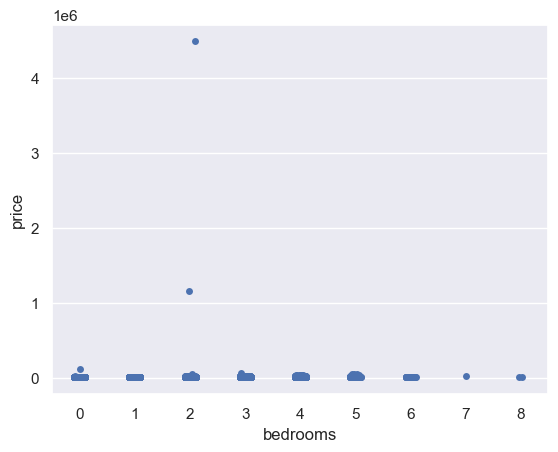

In [42]:
sns.stripplot(x="bedrooms", y="price",data=df,jitter=True);

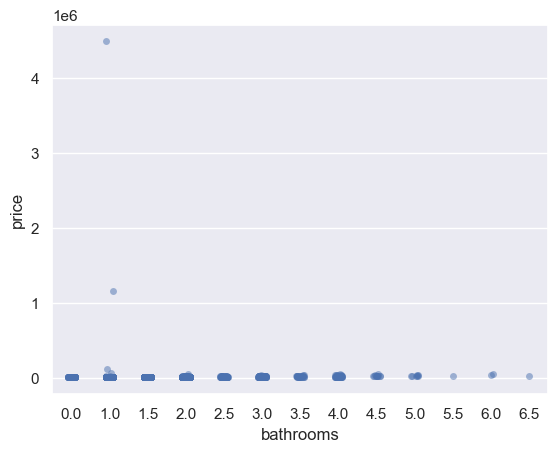

In [43]:
sns.stripplot(x="bathrooms", y="price"
              ,data=df, alpha=.5,jitter=True);

In [10]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['interest_level'])
y=df['interest_level']
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [11]:
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.fit_transform(X_test)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model3= KNeighborsClassifier(n_neighbors=7)
model3.fit(X_train, Y_train)
X_train_prediction = model3.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy*100)
X_test_prediction = model3.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy*100)

Accuracy on Training data :  73.69166666666666
Accuracy on Test data :  68.26666666666667


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy*100)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy*100)

Accuracy on Training data :  69.69166666666666
Accuracy on Test data :  70.96666666666667


In [14]:
import pickle
filename = 'rental_listing.pkl'
pickle.dump(model, open(filename, 'wb'))